In [4]:
import pandas as pd
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

In [5]:
# Задаем путь к файлам
train_path = 'datasets/train.csv'
test_path = 'datasets/test.csv'

# Загружаем данные
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

# Просмотр первых строк данных для проверки
print("Train dataset:")
display(train.head())

print("\nTest dataset:")
display(test.head())

Train dataset:


,booking_number,room_count,price,prepayment_amount,payment_method,booking_date,cancellation_date,check_in,nights,check_out,...,is_prepayment,source_category,region,days_before_checkin,average_price_per_night,price_per_night_per_guest,guests_in_room,month,season,occupancy_rate
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,...,0,Крупные международные платформы,1,7,8566.666667,4283.333333,2.0,4,Spring,5.232267
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата,2022-06-18 14:17:02,NaN,2022-07-11 15:00:00,2,2022-07-13 12:00:00,...,0,Собственные каналы бронирования,1,23,12400.000000,6200.000000,2.0,7,Summer,4.846533
2,20221204-16563-171020423,1,25800.0,12900,Нет,2022-11-14 22:59:30,NaN,2022-12-04 15:00:00,2,2022-12-06 12:00:00,...,0,Собственные каналы бронирования,2,19,12900.000000,6450.000000,2.0,12,Winter,2.240496
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты,2023-09-08 15:55:53,NaN,2023-09-18 15:00:00,1,2023-09-19 12:00:00,...,0,Крупные международные платформы,2,9,10500.000000,10500.000000,1.0,9,Autumn,1.925586
4,20230529-6634-200121971,1,28690.0,28690,Нет,2023-05-20 19:54:13,NaN,2023-05-29 15:00:00,2,2023-05-31 12:00:00,...,0,Собственные каналы бронирования,1,8,14345.000000,3586.250000,4.0,5,Spring,30.710204



Test dataset:


,booking_number,room_count,price,prepayment_amount,payment_method,booking_date,check_in,nights,check_out,source,...,is_prepayment,source_category,region,days_before_checkin,average_price_per_night,price_per_night_per_guest,guests_in_room,month,season,occupancy_rate
0,20231129-16563-238946689,1,23750.0,23750,Нет,2023-11-28 10:34:43,2023-11-29 15:00:00,2,2023-12-01 12:00:00,Официальный сайт,...,0,Собственные каналы бронирования,2,1,11875.000000,3958.333333,3.0,11,Autumn,2.200228
1,20221219-7491-174959103,1,15010.0,7505,Нет,2022-12-12 18:30:43,2022-12-19 15:00:00,2,2022-12-21 12:00:00,Официальный сайт,...,0,Собственные каналы бронирования,2,6,7505.000000,3752.500000,2.0,12,Winter,1.893933
2,20221211-6634-172724329,1,8400.0,8400,Отложенная электронная оплата,2022-11-25 22:03:59,2022-12-11 15:00:00,1,2022-12-12 12:00:00,Официальный сайт,...,0,Собственные каналы бронирования,1,15,8400.000000,4200.000000,2.0,12,Winter,5.057596
3,20230821-6634-212247350,1,42500.0,42500,Нет,2023-07-18 15:45:46,2023-08-21 15:00:00,3,2023-08-24 12:00:00,Официальный сайт,...,0,Собственные каналы бронирования,1,33,14166.666667,3541.666667,4.0,8,Summer,11.167072
4,20230326-6634-189784563,1,62500.0,11900,Нет,2023-03-23 11:04:13,2023-03-26 15:00:00,5,2023-03-31 12:00:00,Официальный сайт,...,0,Собственные каналы бронирования,1,3,12500.000000,12500.000000,1.0,3,Spring,5.232267


In [6]:
target_column = 'is_canceled'

# Отделяем целевой признак от тренировочных данных
X_train = train.drop(columns=[target_column])
y_train = train[target_column]

# В тестовых данных, предполагается, что нет целевого признака
X_test = test

# Определяем числовые и категориальные признаки
numerical_features = [
    'room_count', 'price', 'prepayment_amount', 'nights', 
    'guests', 'is_prepayment', 'days_before_checkin', 
    'average_price_per_night', 'price_per_night_per_guest', 
    'guests_in_room', 'occupancy_rate'
]

categorical_features = [
    'payment_method', 'source', 'room_category', 
    'payment_provider', 'payment_conduction', 
    'source_category', 'season', 'hotel', 'region'
]

# Масштабирование для числовых переменных
numerical_transformer = StandardScaler()

# Кодирование для категориальных переменных
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Объединение через ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Создание Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Применение pipeline к тренировочной выборке
X_train_prepared = pipeline.fit_transform(X_train)

# Применение pipeline к тестовой выборке (используем fit на тренировочных данных, а transform на тестовых)
X_test_prepared = pipeline.transform(X_test)

# Вывод размеров преобразованных данных для проверки
print("Размеры преобразованной train выборки:", X_train_prepared.shape)
print("Размеры преобразованной test выборки:", X_test_prepared.shape)

# Целевой признак y_train также доступен для обучения модели
print("Размеры целевого признака:", y_train.shape)

Размеры преобразованной train выборки: (26174, 56)
Размеры преобразованной test выборки: (11218, 56)
Размеры целевого признака: (26174,)


In [7]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [8]:
# Определение моделей, включая CatBoost, XGBoost, LightGBM, и GradientBoostingClassifier
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'CatBoost': CatBoostClassifier(silent=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'GradientBoosting': GradientBoostingClassifier()
}

# Гиперпараметры для подбора
param_grid = {
    'LogisticRegression': {
        'model__C': [0.01, 0.1, 1.0, 10.0, 100],
        'model__solver': ['lbfgs', 'liblinear']
    },
    'RandomForest': {
        'model__n_estimators': [50, 100, 200, 500],
        'model__max_depth': [None, 5, 10, 15, 20],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    'DecisionTree': {
        'model__max_depth': [5, 10, 20, 30, 50],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    'CatBoost': {
        'model__iterations': [100, 150, 200],
        'model__depth': [4, 6, 8, 10],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__l2_leaf_reg': [1, 3, 5, 7]
    },
    'XGBoost': {
        'model__n_estimators': [100, 150, 200],
        'model__max_depth': [3, 6, 10],
        'model__learning_rate': [0.01, 0.1],
        'model__subsample': [0.7, 0.8, 1.0],
        'model__colsample_bytree': [0.7, 0.8, 1.0]
    },
    'LightGBM': {
        'model__n_estimators': [50, 100, 200],  # Уменьшаем количество итераций
        'model__max_depth': [5, 8, 10],         # Понижаем максимальную глубину
        'model__num_leaves': [15, 31, 50],      # Уменьшаем количество листьев
        'model__learning_rate': [0.01, 0.1]
    },
    'GradientBoosting': {
        'model__n_estimators': [100, 150, 200],
        'model__max_depth': [3, 5, 10],
        'model__learning_rate': [0.01, 0.1]
    }
}

# Создание Pipeline для каждой модели
pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

# Выбор модели и подбор гиперпараметров
for model_name, pipeline in pipelines.items():
    print(f"Подбор гиперпараметров для {model_name}...")
    grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=5, scoring='roc_auc', n_jobs=-1)
    
    # Разделим тренировочные данные на обучение и валидацию
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    # Подбор гиперпараметров
    grid_search.fit(X_train_split, y_train_split)
    
    # Лучшая модель
    best_model = grid_search.best_estimator_
    print(f"Лучшая модель для {model_name}: {grid_search.best_params_}")
    
    # Оценка на валидации
    y_val_pred = best_model.predict_proba(X_val_split)[:, 1]
    roc_auc = roc_auc_score(y_val_split, y_val_pred)
    print(f"ROC-AUC для {model_name}: {roc_auc}\n")

Подбор гиперпараметров для LogisticRegression...
Лучшая модель для LogisticRegression: {'model__C': 0.01, 'model__solver': 'lbfgs'}
ROC-AUC для LogisticRegression: 0.8098150793522475

Подбор гиперпараметров для RandomForest...
Лучшая модель для RandomForest: {'model__max_depth': 15, 'model__min_samples_leaf': 2, 'model__min_samples_split': 10, 'model__n_estimators': 500}
ROC-AUC для RandomForest: 0.8499510438432224

Подбор гиперпараметров для DecisionTree...
Лучшая модель для DecisionTree: {'model__max_depth': 5, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10}
ROC-AUC для DecisionTree: 0.8607073701009367

Подбор гиперпараметров для CatBoost...
Лучшая модель для CatBoost: {'model__depth': 4, 'model__iterations': 150, 'model__l2_leaf_reg': 7, 'model__learning_rate': 0.1}
ROC-AUC для CatBoost: 0.863246599223359

Подбор гиперпараметров для XGBoost...


C:\Users\EPrutskoy\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [00:05:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Лучшая модель для XGBoost: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.01, 'model__max_depth': 6, 'model__n_estimators': 200, 'model__subsample': 0.7}
ROC-AUC для XGBoost: 0.8641650918587742

Подбор гиперпараметров для LightGBM...
[LightGBM] [Info] Number of positive: 4201, number of negative: 16738
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 20939, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200630 -> initscore=-1.382359
[LightGBM] [Info] Start training from score -1.382359
Лучшая модель для LightGBM: {'model__learning_rate': 0.01, 'model__max_depth': 10, 'model__n_estimators': 200, 'model__num_leaves': 31}
ROC-AUC для LightGBM: 0.8642597229923221

Подбор гиперпарамет

In [63]:
# Обучаем полную модель с лучшими параметрами для DecisionTree
best_model_pipeline = pipelines['DecisionTree'].set_params(**grid_search.best_params_)

# Проводим обучение на всех тренировочных данных
best_model_pipeline.fit(X_train, y_train)

# Применяем модель для предсказания на тестовых данных
test_predictions = best_model_pipeline.predict_proba(X_test)[:, 1]  # Вероятности для класса 1

# Округление до бинарных предсказаний
binary_predictions = (test_predictions >= 0.5).astype(int)

# Сохранение предсказаний в CSV файл без заголовков и индексов
pd.DataFrame(binary_predictions).to_csv('test_predictions.csv', index=False, header=False)

# Вывод первых строк для проверки
print(pd.DataFrame(binary_predictions).head())

   0
0  0
1  0
2  0
3  0
4  0


In [65]:
sum(binary_predictions)

1297

In [67]:
# Сохранение предсказаний в CSV файл с индексами, начиная с 1, но без отдельного столбца для индексов
pd.DataFrame(binary_predictions).to_csv('test_predictions.csv', index=True, header=False, index_label=False)

# Присваиваем индексацию с 1
test_predictions_df = pd.DataFrame(binary_predictions)
test_predictions_df.index = range(1, len(test_predictions_df) + 1)

# Сохранение в CSV файл без заголовков и без столбца индекса
test_predictions_df.to_csv('test_predictions.csv', index=False, header=False)


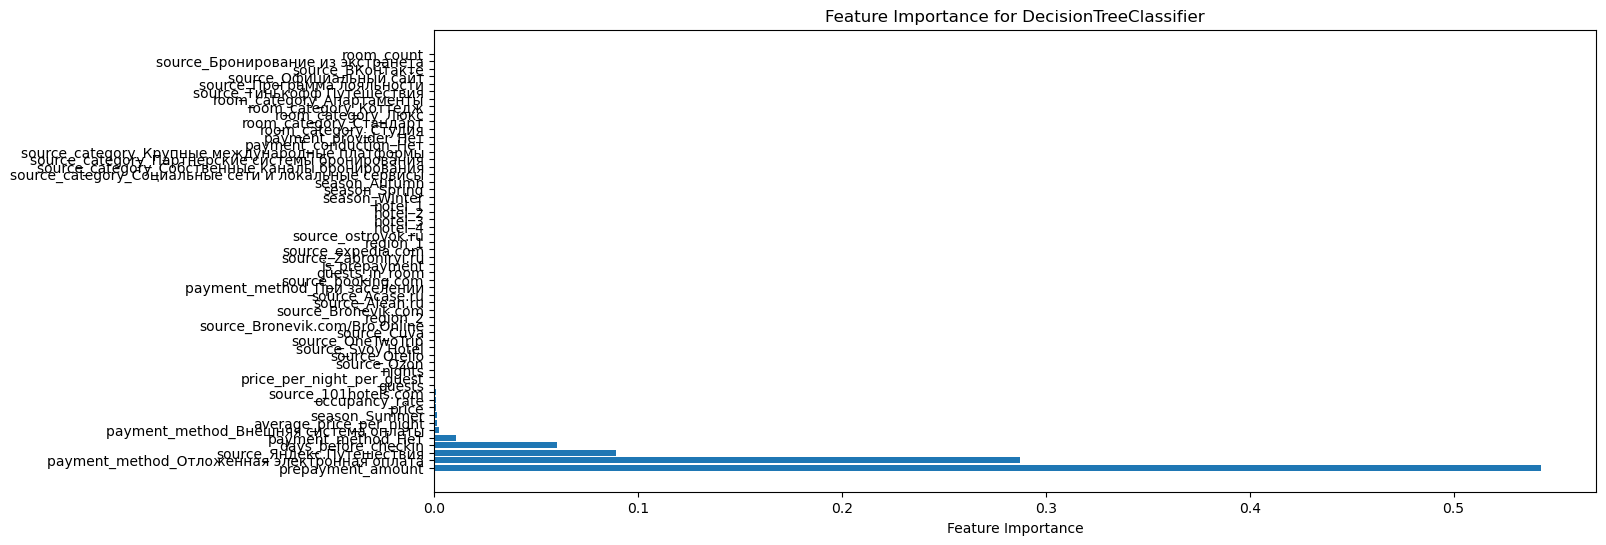

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Получение важности признаков для DecisionTree
feature_importances = best_model_pipeline.named_steps['model'].feature_importances_

# Извлечение имен признаков после предобработки
onehot_encoder = best_model_pipeline.named_steps['preprocessor'].transformers_[1][1]
categorical_feature_names = onehot_encoder.get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, categorical_feature_names])

# Сортировка признаков по важности
sorted_idx = np.argsort(feature_importances)[::-1]

# Отображение важности признаков
plt.figure(figsize=(15, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(feature_importances)), np.array(all_feature_names)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for DecisionTreeClassifier')
plt.show()

In [ ]:
import shap

# Инициализация SHAP объяснителя для логистической регрессии
explainer = shap.Explainer(best_model_pipeline.named_steps['model'], X_train_prepared)


In [ ]:

# Рассчет SHAP значений для первых 100 примеров
shap_values = explainer.shap_values(X_train_prepared)


In [78]:
shap_values

.values =
array([[[ 0.00000000e+00,  0.00000000e+00],
        [ 2.11718678e-05, -2.11720914e-05],
        [-5.03755633e-01,  5.03755646e-01],
        ...,
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00],
        [ 3.03455144e-04, -3.03455275e-04],
        [ 1.21992699e-01, -1.21992700e-01],
        ...,
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00],
        [ 3.03455144e-04, -3.03455275e-04],
        [ 8.00658193e-02, -8.00658192e-02],
        ...,
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00]],

       ...,

       [[ 0.00000000e+00,  0.00000000e+00],
        [ 3.03455144e-04, -3.03455275e-04],
        [ 7.13740423e-02, -7.13740434e-02],
        

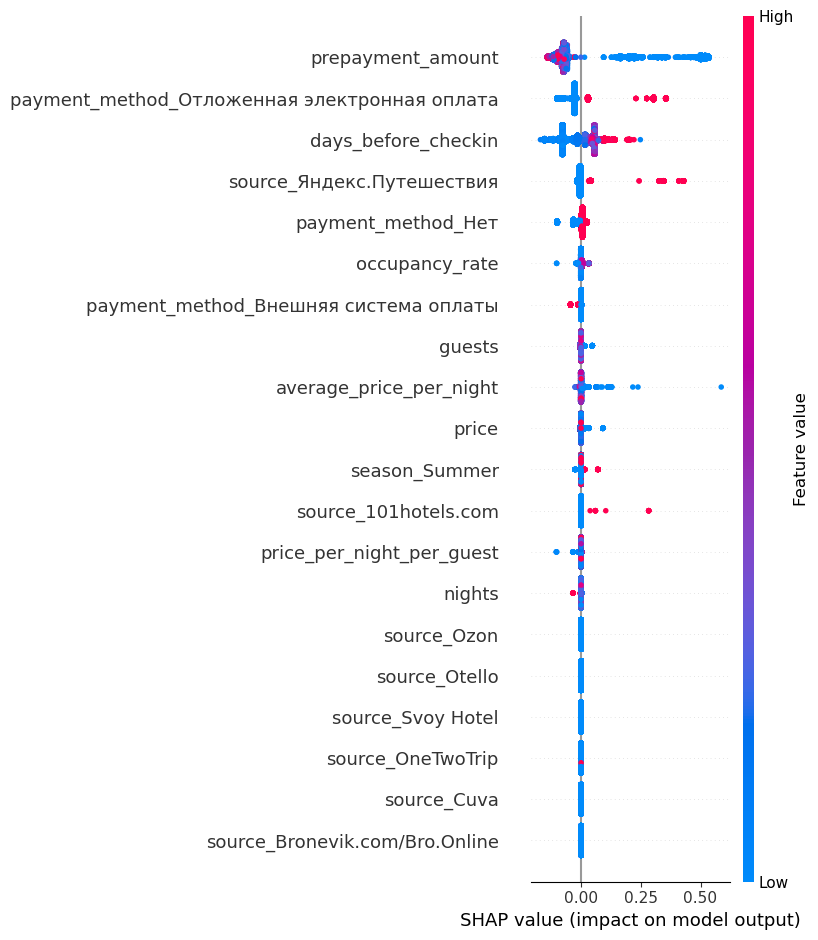

In [84]:
# Используем модель и данные из Pipeline
explainer = shap.Explainer(best_model_pipeline.named_steps['model'], X_train_prepared)

# Рассчитываем SHAP значения
shap_values = explainer(X_train_prepared)

# Для бинарной классификации используем только SHAP значения для класса 1
shap_values_for_class_1 = shap_values[..., 1]

# Настройка размера графика
plt.figure(figsize=(12, 8))  # Настраиваем ширину и высоту (в дюймах)

# Построение SHAP summary plot
shap.summary_plot(shap_values_for_class_1, X_train_prepared, feature_names=all_feature_names)

plt.show()

In [81]:
X_train_prepared

array([[-0.27429928, -0.26380585, -0.97102736, ...,  0.        ,
         1.        ,  0.        ],
       [-0.27429928, -0.2986943 , -0.30909619, ...,  0.        ,
         1.        ,  0.        ],
       [-0.27429928, -0.25992936, -0.28240541, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.27429928,  0.89526596, -0.22902387, ...,  0.        ,
         1.        ,  0.        ],
       [-0.27429928, -1.01584576, -0.97102736, ...,  0.        ,
         0.        ,  1.        ],
       [-0.27429928, -0.30644729,  0.34215868, ...,  0.        ,
         1.        ,  0.        ]])

In [82]:
all_feature_names

array(['room_count', 'price', 'prepayment_amount', 'nights', 'guests',
       'is_prepayment', 'days_before_checkin', 'average_price_per_night',
       'price_per_night_per_guest', 'guests_in_room', 'occupancy_rate',
       'payment_method_Внешняя система оплаты', 'payment_method_Нет',
       'payment_method_Отложенная электронная оплата',
       'payment_method_При заселении', 'source_101hotels.com',
       'source_Acase.ru', 'source_Alean.ru', 'source_Bronevik.com',
       'source_Bronevik.com/Bro.Online', 'source_Cuva',
       'source_OneTwoTrip', 'source_Otello', 'source_Ozon',
       'source_Svoy Hotel', 'source_Zabroniryi.ru', 'source_booking.com',
       'source_expedia.com', 'source_ostrovok.ru',
       'source_Бронирование из экстранета', 'source_ВКонтакте',
       'source_Официальный сайт', 'source_Программа лояльности',
       'source_Тинькофф Путешествия', 'source_Яндекс.Путешествия',
       'room_category_Апартаменты', 'room_category_Коттедж',
       'room_category_Люкс', 

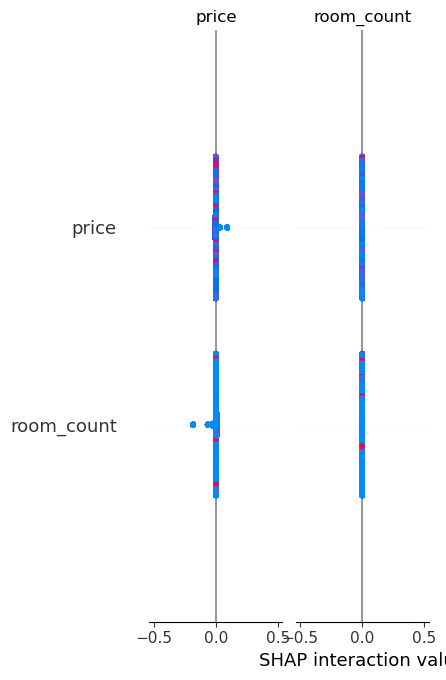

In [79]:

# Визуализация важности признаков
shap.summary_plot(shap_values, X_train_prepared, feature_names=all_feature_names)

In [ ]:
explainer = shap.Explainer(best_model_pipeline.named_steps['model'], X_train_prepared)

# Рассчет SHAP значений для первых 100 примеров
shap_values = explainer.shap_values(X_train_prepared)

# Визуализация важности признаков
shap.summary_plot(shap_values, X_train_prepared, feature_names=all_feature_names)

In [ ]:
target_column = 'is_canceled'

# Отделяем целевой признак от тренировочных данных
X_train = train.drop(columns=[target_column])
y_train = train[target_column]

# В тестовых данных, предполагается, что нет целевого признака
X_test = test

# Определяем числовые и категориальные признаки
numerical_features = [
    'room_count', 'price', 'prepayment_amount', 'nights', 
    'guests', 'is_prepayment', 'days_before_checkin', 
    'average_price_per_night', 'price_per_night_per_guest', 
    'guests_in_room', 'occupancy_rate'
]

categorical_features = [
    'payment_method', 'source', 'room_category', 
    'payment_provider', 'payment_conduction', 
    'source_category', 'season', 'hotel', 'region'
]

# Масштабирование для числовых переменных
numerical_transformer = StandardScaler()

# Кодирование для категориальных переменных
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Объединение через ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Создание Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Применение pipeline к тренировочной выборке
X_train_prepared = pipeline.fit_transform(X_train)

# Применение pipeline к тестовой выборке (используем fit на тренировочных данных, а transform на тестовых)
X_test_prepared = pipeline.transform(X_test)

# Вывод размеров преобразованных данных для проверки
print("Размеры преобразованной train выборки:", X_train_prepared.shape)
print("Размеры преобразованной test выборки:", X_test_prepared.shape)

# Целевой признак y_train также доступен для обучения модели
print("Размеры целевого признака:", y_train.shape)

Размеры преобразованной train выборки: (26174, 56)
Размеры преобразованной test выборки: (11218, 56)
Размеры целевого признака: (26174,)


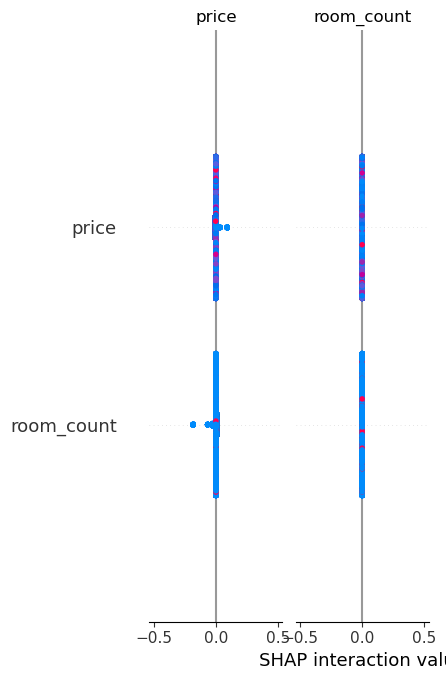

In [74]:
explainer = shap.Explainer(best_model_pipeline.named_steps['model'], X_train_prepared)

# Рассчет SHAP значений для тренировочных данных
shap_values = explainer.shap_values(X_train_prepared)

# Визуализация summary plot (общая важность признаков)
shap.summary_plot(shap_values, X_train_prepared, feature_names=all_feature_names)

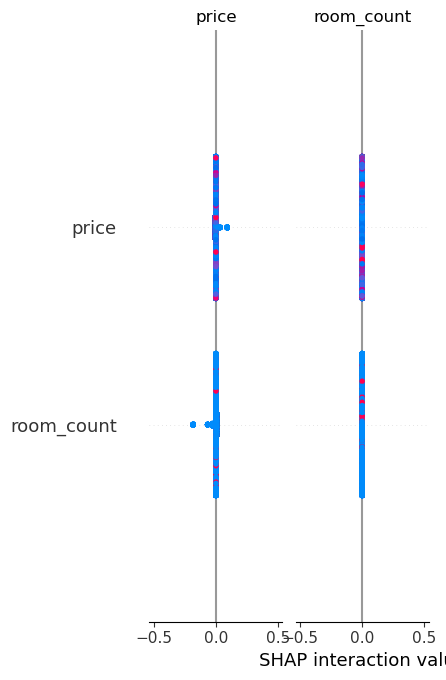

In [75]:
# Используем модель и данные из Pipeline
explainer = shap.Explainer(best_model_pipeline.named_steps['model'], X_train_prepared)

# Рассчитываем SHAP значения
shap_values = explainer(X_train_prepared)

# Получаем имена признаков после OneHotEncoding и других трансформаций
onehot_encoder = best_model_pipeline.named_steps['preprocessor'].transformers_[1][1]
categorical_feature_names = onehot_encoder.get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, categorical_feature_names])

# Построение нового SHAP summary plot
shap.summary_plot(shap_values, X_train_prepared, feature_names=all_feature_names)

In [26]:
# Лучшая модель на основе ROC-AUC - LightGBM
best_model = pipelines['LightGBM'].set_params(**grid_search.best_params_)

# Проводим обучение на всех тренировочных данных
best_model.fit(X_train, y_train)

# Применяем модель для предсказания на тестовых данных
test_predictions = best_model.predict_proba(X_test)[:, 1]  # Вероятности для класса 1

# Округление до бинарных предсказаний
binary_predictions = (test_predictions >= 0.45).astype(int)

# Сохранение предсказаний в CSV файл без заголовков и индексов
pd.DataFrame(binary_predictions).to_csv('test_predictions.csv', index=False, header=False)

# Вывод первых строк для проверки
print(pd.DataFrame(binary_predictions))

[LightGBM] [Info] Number of positive: 5192, number of negative: 20982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,002029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1330
[LightGBM] [Info] Number of data points in the train set: 26174, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0,198365 -> initscore=-1,396546
[LightGBM] [Info] Start training from score -1,396546
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [24]:
print(sum(pd.DataFrame(binary_predictions)))

0


In [28]:
sum(binary_predictions)

1258

In [30]:
# Создаем DataFrame из предсказаний
test_predictions_df = pd.DataFrame(binary_predictions)

# Присваиваем индексацию с 1
test_predictions_df.index = range(1, len(test_predictions_df) + 1)

# Сохранение в CSV файл без заголовков и без столбца индекса
test_predictions_df.to_csv('test_predictions3.csv', index=False, header=False)
